In [2]:
pip install tensorflow keras pandas matplotlib numpy scikit-learn seaborn opencv-python


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.2.5_1/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip list

Package                   Version
------------------------- --------------
absl-py                   2.1.0
anyio                     4.4.0
appnope                   0.1.4
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.1
astunparse                1.6.3
async-lru                 2.0.4
attrs                     24.2.0
babel                     2.16.0
beautifulsoup4            4.12.3
bleach                    6.1.0
certifi                   2024.8.30
cffi                      1.17.0
charset-normalizer        3.3.2
comm                      0.2.2
contourpy                 1.3.0
cycler                    0.12.1
debugpy                   1.8.5
decorator                 5.1.1
defusedxml                0.7.1
executing                 2.0.1
fastjsonschema            2.20.0
flatbuffers               24.3.25
fonttools                 4.53.1
fqdn                      1.5.1
gast                      0.6.0
google-pasta  

In [4]:
pip --version

pip 24.2 from /opt/homebrew/lib/python3.12/site-packages/pip (python 3.12)
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install kagglehub


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.2.5_1/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from PIL import Image

# Load the labels CSV
df = pd.read_csv('dataset/3/Data_Entry_2017.csv')
print(df.head())


        Image Index          Finding Labels  Follow-up #  Patient ID  \
0  00000001_000.png            Cardiomegaly            0           1   
1  00000001_001.png  Cardiomegaly|Emphysema            1           1   
2  00000001_002.png   Cardiomegaly|Effusion            2           1   
3  00000002_000.png              No Finding            0           2   
4  00000003_000.png                  Hernia            0           3   

   Patient Age Patient Gender View Position  OriginalImage[Width  Height]  \
0           58              M            PA                 2682     2749   
1           58              M            PA                 2894     2729   
2           58              M            PA                 2500     2048   
3           81              M            PA                 2500     2048   
4           81              F            PA                 2582     2991   

   OriginalImagePixelSpacing[x     y]  Unnamed: 11  
0                        0.143  0.143          NaN 

In [8]:
# Separate multiple labels
all_labels = df['Finding Labels'].str.split('|').sum()
unique_labels = pd.Series(all_labels).value_counts()
print("Unique Labels and their counts:\n", unique_labels)

Unique Labels and their counts:
 No Finding            60361
Infiltration          19894
Effusion              13317
Atelectasis           11559
Nodule                 6331
Mass                   5782
Pneumothorax           5302
Consolidation          4667
Pleural_Thickening     3385
Cardiomegaly           2776
Emphysema              2516
Edema                  2303
Fibrosis               1686
Pneumonia              1431
Hernia                  227
Name: count, dtype: int64


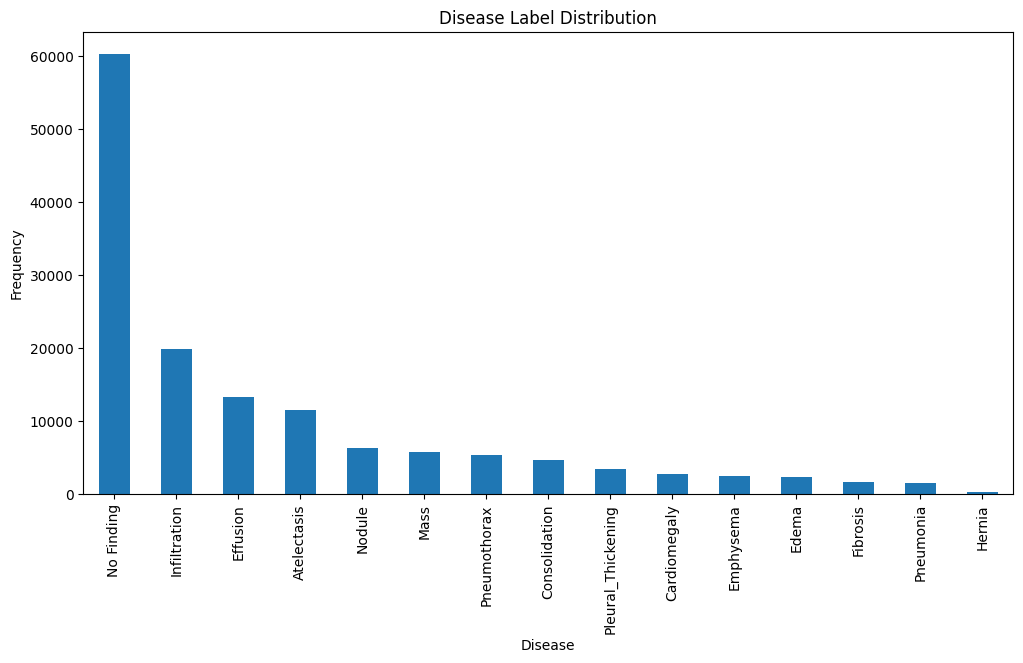

In [9]:
# Plot label distribution
unique_labels.plot(kind='bar', figsize=(12, 6), title="Disease Label Distribution")
plt.xlabel("Disease")
plt.ylabel("Frequency")
plt.show()

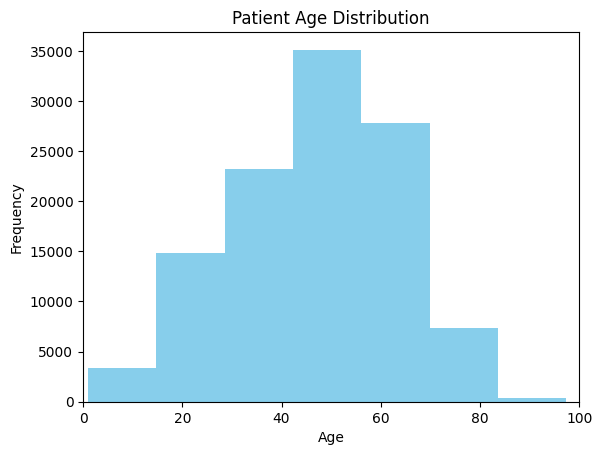

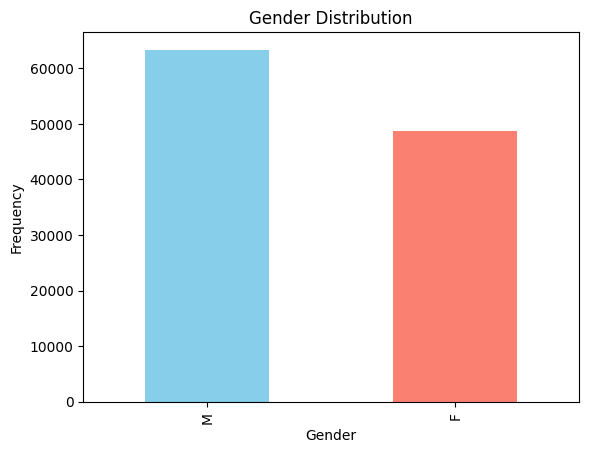

In [89]:
# Plot patient age distribution
plt.hist(df['Patient Age'], bins=30, color='skyblue')
plt.xlim(0, 100)
plt.title("Patient Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Plot gender distribution
df['Patient Gender'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Frequency")
plt.show()

In [11]:
# One-hot encode the labels
df_expanded = df['Finding Labels'].str.get_dummies(sep='|')
df = pd.concat([df, df_expanded], axis=1)

In [76]:
df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,...,0,0,0,0,0,0,0,0,0,0
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,...,1,0,0,0,0,0,0,0,0,0
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,...,0,0,0,0,0,0,0,0,0,0
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,...,0,0,0,0,0,1,0,0,0,0
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,...,0,0,1,0,0,0,0,0,0,0


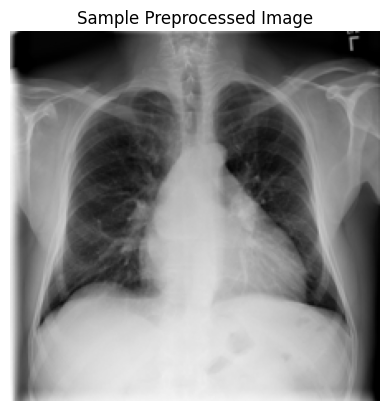

In [12]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator


image_size = (224, 224)
image_path = 'dataset/3/images_001/images/'  

# Data generator for data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,           
    rotation_range=20,        
    width_shift_range=0.1,     
    height_shift_range=0.1,    
    zoom_range=0.2,            
    horizontal_flip=True       
)

# Function to load, resize, and preprocess images
def preprocess_image(image_name):
    img_path = os.path.join(image_path, image_name)
    image = Image.open(img_path).convert('RGB')
    image = image.resize(image_size)
    image_array = np.array(image) / 255.0  # normalize pixel values
    return image_array


sample_image = preprocess_image(df.loc[0, 'Image Index'])
plt.imshow(sample_image)
plt.title("Sample Preprocessed Image")
plt.axis('off')
plt.show()

In [13]:
train_val_list_path = 'dataset/3/train_val_list.txt'
test_list_path = 'dataset/3/test_list.txt'

with open(train_val_list_path, 'r') as f:
    train_val_images = f.read().splitlines()

with open(test_list_path, 'r') as f:
    test_images = f.read().splitlines()

In [14]:
# Map each image to its disease labels
label_map = {}
for _, row in df.iterrows():
    label_map[row['Image Index']] = row['Finding Labels']

In [ ]:
for image_name in train_val_images + test_images:
    print(f"{image_name}")

In [ ]:
import numpy as np
import os
from PIL import Image

# Define image parameters
base_dir = 'dataset/3'
image_size = (224, 224)  # Resize all images to 224x224
preprocessed_dir = 'dataset/preprocessed_images'
os.makedirs(preprocessed_dir, exist_ok=True)  # Directory to save preprocessed images

# Loop through the folders from images_001 to images_012
for i in range(1, 13):
    folder_name = f"images_{i:03d}/images"  # Format folder name as images_001, images_002, etc.
    folder_path = os.path.join(base_dir, folder_name)

    # Check if the path exists to avoid errors
    if not os.path.exists(folder_path):
        print(f"Folder {folder_path} does not exist.")
        continue

    # Loop through each image file in the folder
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.png'):
            image_path = os.path.join(folder_path, file_name)

            # Preprocess the image
            try:
                image = Image.open(image_path).convert('RGB')
                image = image.resize(image_size)
                image_array = np.array(image) / 255.0  # Normalize pixel values

                # Save preprocessed image as .npy
                np.save(os.path.join(preprocessed_dir, f"{file_name}.npy"), image_array)
                print(f"Processed and saved: {file_name}")
            except Exception as e:
                print(f"Error processing {file_name}: {e}")


In [ ]:
import numpy as np
import os
from tensorflow.keras.utils import Sequence
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set up augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,  # Reduce rotation
    width_shift_range=0.05,
    height_shift_range=0.05,
    zoom_range=0.1,
    horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1./255)


class ChestXRayDataGenerator(Sequence):
    def __init__(self, image_list, labels, batch_size, img_size, image_dir, is_training=False):
        self.image_list = image_list
        self.labels = labels
        self.batch_size = batch_size
        self.img_size = img_size
        self.image_dir = image_dir
        self.is_training = is_training

        
        self.datagen = train_datagen if is_training else val_test_datagen

       
        self.unique_labels = df['Finding Labels'].unique()  # List of unique labels
        self.num_classes = len(self.unique_labels)  # Number of classes

    def __len__(self):
        return int(np.ceil(len(self.image_list) / self.batch_size))

    def __getitem__(self, idx):
        # print(f"{self.num_classes}")
        batch_images = self.image_list[idx * self.batch_size : (idx + 1) * self.batch_size]
        batch_data = []
        batch_labels = []

        for image_name in batch_images:
            # print(f"{image_name}")
            npy_file_name = f"{image_name}.npy"  
            npy_file_path = os.path.join(self.image_dir, npy_file_name) 
            # print(f"{npy_file_path}")
            # Load the preprocessed .npy file
            image_array = np.load(npy_file_path)  

            # Check if the image was successfully loaded
            # print(f"{image_array.shape} {self.img_size}")
            if image_array.shape != self.img_size + (3,):
                # print(f"{image_name} not successfully loaded")
                image_array = np.resize(image_array, self.img_size + (3,))  

            # Get label in one-hot format
            label = self.labels.get(image_name, 'No Finding').split('|')
            label_vector = np.zeros(self.num_classes)  # Initialize one-hot vector

            for l in label:
                if l in self.unique_labels:  # Check if label exists
                    label_vector[np.where(self.unique_labels == l)[0][0]] = 1 

            batch_data.append(image_array)
            batch_labels.append(label_vector)

        return np.array(batch_data), np.array(batch_labels)


image_dir = 'dataset/preprocessed_images'  # Base directory for .npy files
image_size = (224, 224)   # Desired image size
batch_size = 32            # Number of images per batch

# Create train and test generators
train_generator = ChestXRayDataGenerator(train_val_images, label_map, batch_size, image_size, image_dir, is_training=True)
test_generator = ChestXRayDataGenerator(test_images, label_map, batch_size, image_size, image_dir, is_training=False)


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_model(input_shape):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(256, (3, 3), activation='relu'))  # Add more filters
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))  # Increase the number of neurons
    model.add(Dropout(0.5))  # Dropout layer to reduce overfitting
    model.add(Dense(train_generator.num_classes, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

input_shape = (224, 224, 3)
model = create_model(input_shape)


base_model = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=3,  # or any desired number of epochs
    validation_data=test_generator,
    validation_steps=len(test_generator)
)

In [83]:
from itertools import combinations
from collections import Counter

# Count combinations of diseases (comorbidities)
comorbidities = Counter()
for labels in df['Finding Labels']:
    if len(labels) > 1:
        for combo in combinations(labels, 2):
            comorbidities[combo] += 1

# Display most common comorbidities
print("Top 10 Comorbidities:")
print(comorbidities.most_common(10))

Top 10 Comorbidities:
[(('Effusion', 'Infiltration'), 3998), (('Atelectasis', 'Effusion'), 3270), (('Atelectasis', 'Infiltration'), 3260), (('Infiltration', 'Nodule'), 1545), (('Consolidation', 'Effusion'), 1287), (('Effusion', 'Mass'), 1253), (('Atelectasis', 'Consolidation'), 1222), (('Consolidation', 'Infiltration'), 1221), (('Infiltration', 'Mass'), 1158), (('Cardiomegaly', 'Effusion'), 1061)]


In [ ]:
import cv2
import numpy as np


image_dir = 'dataset/3'

sample_images = df['Image Index'].sample(100)
aspect_ratios = []

for image_name in sample_images:
    image_path = os.path.join(image_dir, image_name)
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is not None:
        aspect_ratio = image.shape[1] / image.shape[0]  # width / height
        aspect_ratios.append(aspect_ratio)

# Plot aspect ratios
plt.figure(figsize=(10, 5))
plt.hist(aspect_ratios, bins=20, color="skyblue")
plt.title("Distribution of Aspect Ratios in Sample Images")
plt.xlabel("Aspect Ratio (Width / Height)")
plt.ylabel("Frequency")
plt.show()

/var/folders/c5/5xjg5k313ng01sll9bghp2_40000gn/T/ipykernel_93769/2135770901.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=age_labels, x='Finding Labels', y='Patient Age', palette="coolwarm")


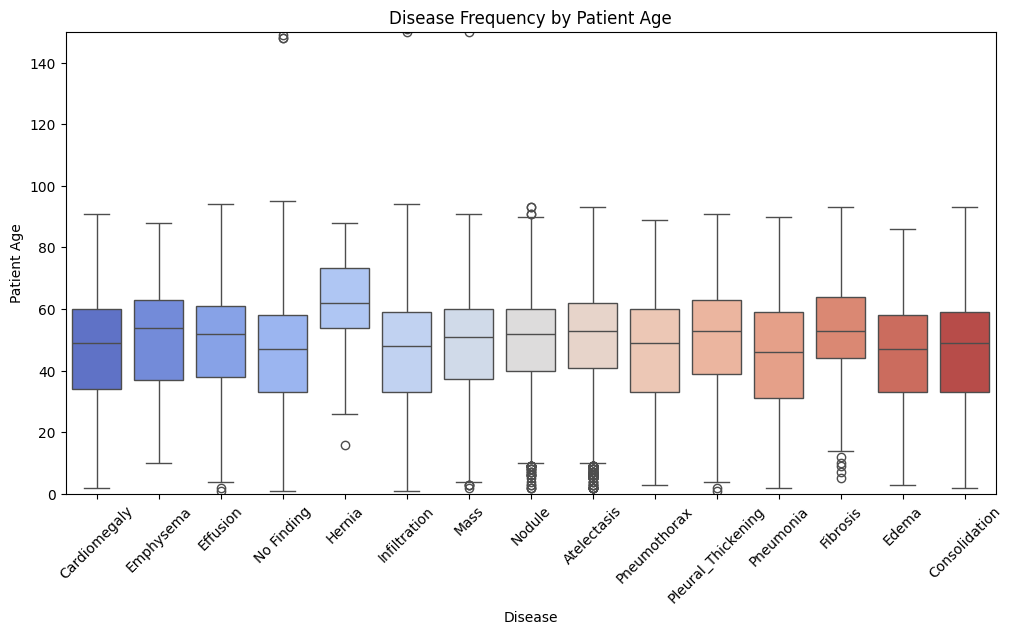

In [88]:
if 'Patient Age' in df.columns:
    age_labels = df.explode('Finding Labels')
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=age_labels, x='Finding Labels', y='Patient Age', palette="coolwarm")
    plt.xticks(rotation=45)
    plt.ylim(0, 150)  # Set y-axis limit to 150
    plt.title('Disease Frequency by Patient Age')
    plt.xlabel('Disease')
    plt.ylabel('Patient Age')
    plt.show()